# Code Source and Improvement
The code was obtained from : [Jay Bhatt](https://www.youtube.com/watch?v=uqomO_BZ44g), [The code in Github](https://bitbucket.org/temn/nordlinglab-introai/src/master/Diary/Scott_Chen?mode=edit&at=master) and the content was modified.

* The data comes from my capture photos 
---




Found 15 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7257 - accuracy: 0.0000e+00 - val_loss: 2.4872 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 33.8417 - accuracy: 0.5000 - val_loss: 0.7915 - val_accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 1s 889ms/step - loss: 0.3479 - accuracy: 0.5000 - val_loss: 1.7267 - val_accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 1s 695ms/step - loss: 0.1550 - accuracy: 1.0000 - val_loss: 3.2859 - val_accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 1s 809ms/step - loss: 19.0299 - accuracy: 0.0000e+00 - val_loss: 1.0135 - val_accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 1s 790ms/step - loss: 9.5095 - accuracy: 0.5000 - val_loss: 1.0695 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 1s 839ms/step - loss: 1.71

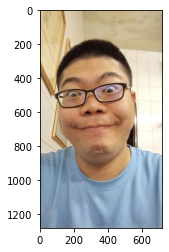

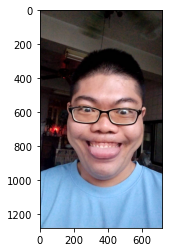

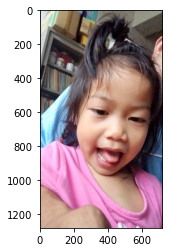

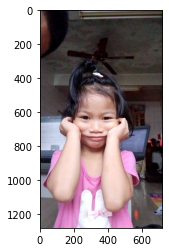

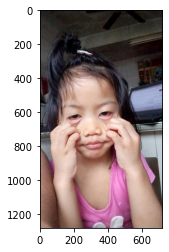

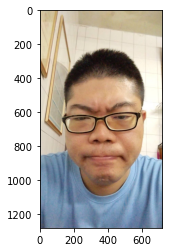

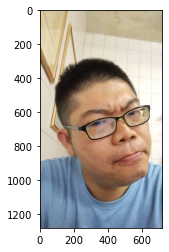

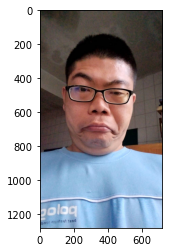

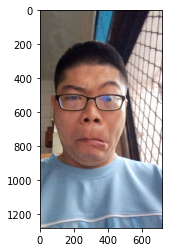

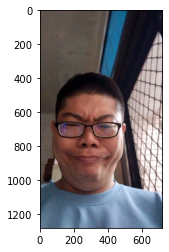

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import preprocessing

# img1 = image.load_img('face test/Happy/126822.jpg')
# img1 = image.load_img('C:\\Users\\Lenovo\\Documents\\AI_scott\\face test\\train\\126822.jpg')
img1 = image.load_img(r'C:\Users\Lenovo\Documents\AI_scott\face test\Happy\126822.jpg')

plt.imshow(img1)

img = cv2.imread('face test/Happy/126633.jpg')

# img2 = cv2.imread('face test/Happy/126633.jpg').shape
img.shape

train = ImageDataGenerator(rescale=1/166)
validation = ImageDataGenerator(rescale=1/166)

train_dataset = train.flow_from_directory('face test/train',
                                          target_size=(200,200),
                                          batch_size = 2,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory('face test/train',
                                                    target_size=(200,200),
                                                    batch_size = 2,
                                                    class_mode = 'binary')

temp = (train_dataset[0][0])
temp.shape
# train_dataset[0]

train_dataset.class_indices

train_dataset.classes

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='lecun_normal', input_shape = (200,200,3)),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='lecun_normal',),
        tf.keras.layers.MaxPool2D(2,2),
        
#         tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#         tf.keras.layers.MaxPool2D(2,2),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(512,activation = 'relu',kernel_initializer='lecun_normal',),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer='lecun_normal',),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(64,activation = 'relu',kernel_initializer='lecun_normal',),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(4,activation = 'relu',kernel_initializer='lecun_normal',),
        tf.keras.layers.Dropout(0.5),
        
        
#         tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1,activation = 'sigmoid')
    ]
)

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

model_fit = model.fit(train_dataset,
                     steps_per_epoch=1,
                     epochs=50,
                     validation_data=validation_dataset)

dir_path = 'face test/train'

for i in os.listdir(dir_path):
    print(i)
    
    dir_path = 'face test/train'

for root, dirs, files in os.walk(dir_path):
    
    
#     for dir in dirs:
#         print('dir: ', dir)
    
    for file in files:
        
        temp_path_img = os.path.join(root, file)
        
#         print('file: ', file)
#         print('temp_path_img: ', temp_path_img)
        img = image.load_img(temp_path_img)
    
        plt.figure()
        plt.imshow(img)
        plt.show()
# for i in os.li



# # stdir(dir_path)
# #     img = image.load_img(dir_path+'//'+i)
# #     plt.imshow(img)

# validation_dataset

# for temp_data_batch in validation_dataset:
    
# #     print(temp_data[0].shape)

# #     temp_val_score = model.predict(temp_data_batch[0])

# #     print('temp_val_score: ', temp_val_score)

#     for temp_data in temp_data_batch[0]:
        
#         print(temp_data.shape)
        
#         temp_data = np.expand_dims(temp_data, axis=0)
        
#         print(temp_data.shape)
        
#         temp_val_score = model.predict(temp_data)
        
#         print('temp_val_score: ', temp_val_score)
        
#         plt.figure()
#         plt.imshow(temp_data[0, :, :, :], 'gray')
#         plt.title(temp_val_score[0][0])
#         plt.show()
        
# #         break
# #     break

model.save('face test_V4.h5')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.50640893]]


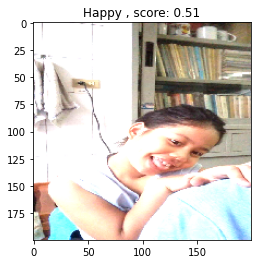

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5100003]]


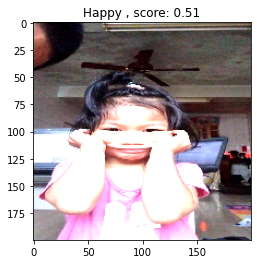

i_count:  2
(200, 200, 3)
(1, 200, 200, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


temp_val_score:  [[0.5090486]]


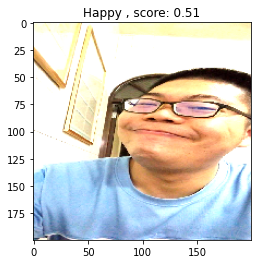

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.51229835]]


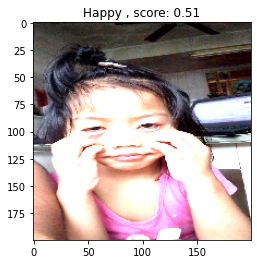

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i_count:  4
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5182871]]


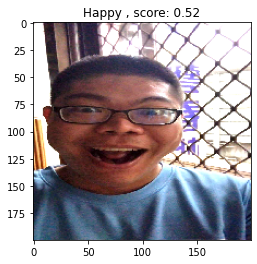

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5085946]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i_count:  6
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5103778]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.50894654]]


i_count:  8
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5116556]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


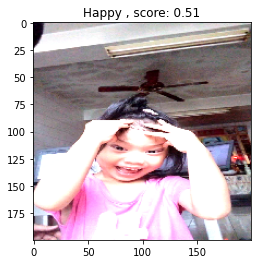

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5114598]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i_count:  10
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5109866]]


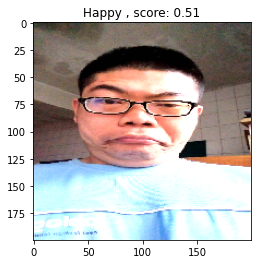

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5097466]]


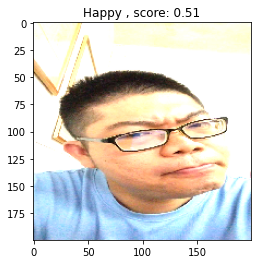

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i_count:  12
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5108005]]


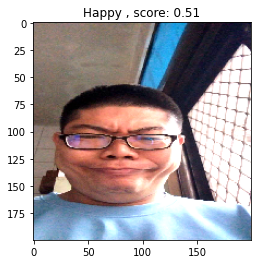

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5079551]]


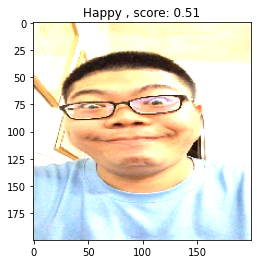

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


i_count:  14
(200, 200, 3)
(1, 200, 200, 3)
temp_val_score:  [[0.5118388]]


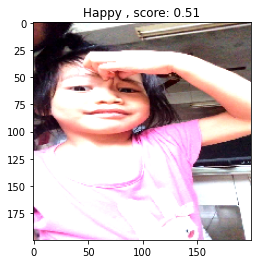

i_count:  15


In [35]:

# stdir(dir_path)
#     img = image.load_img(dir_path+'//'+i)
#     plt.imshow(img)

validation_dataset

i_count = 0
for i, temp_data_batch in enumerate(validation_dataset):
    
#     print('i: ', i)
    
#     print(temp_data[0].shape)

#     temp_val_score = model.predict(temp_data_batch[0])

#     print('temp_val_score: ', temp_val_score)

    for temp_data in temp_data_batch[0]:
        
        print(temp_data.shape)
        
        temp_data = np.expand_dims(temp_data, axis=0)
        
        print(temp_data.shape)
        
        temp_val_score = model.predict(temp_data)
        
        print('temp_val_score: ', temp_val_score)
        
        plt.figure()
        plt.imshow(temp_data[0, :, :, :], 'gray')
        plt.title('%s , score: %1.2f' %('Happy' if temp_val_score[0][0] > 0.5 else 'Unhappy.', temp_val_score[0][0]))
#         plt.title(temp_val_score[0][0])
        plt.show()
        
        i_count += 1
        
        if i_count >= 15:
            break
        
    print('i_count: ', i_count)
    if i_count >= 15:
        break
        
# #         break
# #     break

In [30]:
validation_dataset